In [1]:
!pwd

/panda/eedy/ion_los-angle/s1_a166/notebook


In [2]:
import os
import h5py
import numpy as np
import mintpy
from mintpy.objects import ifgramStack
from mintpy.utils import readfile, writefile, plot, utils as ut

ERROR 1: PROJ: proj_create_from_database: Open of /home/eedy/tools/mambaforge/envs/insar/share/proj failed


In [3]:
!diff.py ../mintpy_split_ion_upsample/velocity.h5 ../mintpy_gim_ion_upsample/velocity.h5 -o diff_split_gim_vel.h5
!diff.py ../mintpy_split_ion_upsample/velocity.h5 ../mintpy_no_ion_upsample/velocity.h5 -o diff_split_no_vel.h5
!diff.py ../mintpy_split_ion_upsample/velocity.h5 ../mintpy_hight_gim_ion_upsample/velocity.h5 -o diff_split_hight_gim_vel.h5

../mintpy_split_ion_upsample/velocity.h5 - ['../mintpy_gim_ion_upsample/velocity.h5'] --> diff_split_gim_vel.h5
the 1st input file is: velocity
List of common datasets across files:  ['residue', 'intercept', 'velocity', 'velocityStd', 'interceptStd']
differencing residue ...
differencing intercept ...
differencing velocity ...
* referencing data from velocity.h5 to y/x: 548/59
differencing velocityStd ...
differencing interceptStd ...
use metadata from the 1st file: ../mintpy_split_ion_upsample/velocity.h5
delete exsited file: diff_split_gim_vel.h5
create HDF5 file: diff_split_gim_vel.h5 with w mode
create dataset /residue      of float32    in size of (690, 228)           with compression=None
create dataset /intercept    of float32    in size of (690, 228)           with compression=None
create dataset /velocity     of float32    in size of (690, 228)           with compression=None
create dataset /velocityStd  of float32    in size of (690, 228)           with compression=None
creat

In [4]:
path = 'diff_split_gim_vel.h5'
with h5py.File(path, 'r') as file:
    diff_velocity_gim = file['velocity']
    diff_velocity_gim = diff_velocity_gim[()]

path2 = '../mintpy_split_ion_upsample/maskTempCoh.h5'
with h5py.File(path2, 'r') as file:
    mask = file['mask']
    mask = mask[()]

masked_diff_velocity_gim = np.where(mask == 0, np.nan, diff_velocity_gim)
masked_diff_velocity_gim_mm = masked_diff_velocity_gim*1000
mean = np.nanmean(masked_diff_velocity_gim_mm)
# 计算中位数
median = np.nanmedian(masked_diff_velocity_gim_mm)
# 计算离散度
variance = np.nanvar(masked_diff_velocity_gim_mm)
print("Mean:", mean)
print("Median:", median)
print("Variance:", variance)

Mean: -0.00014351326
Median: -0.00013418053
Variance: 2.0217999e-07


In [5]:
path = 'diff_split_no_vel.h5'
with h5py.File(path, 'r') as file:
    diff_velocity_no = file['velocity']
    diff_velocity_no = diff_velocity_no[()]

path2 = '../mintpy_split_ion_upsample/maskTempCoh.h5'
with h5py.File(path2, 'r') as file:
    mask = file['mask']
    mask = mask[()]

masked_diff_velocity_no = np.where(mask == 0, np.nan, diff_velocity_no)
masked_diff_velocity_no_mm = masked_diff_velocity_no*1000
mean = np.nanmean(masked_diff_velocity_no_mm)
# 计算中位数
median = np.nanmedian(masked_diff_velocity_no_mm)
# 计算离散度
variance = np.nanvar(masked_diff_velocity_no_mm)
print("Mean:", mean)
print("Median:", median)
print("Variance:", variance)

Mean: 0.0006815765
Median: 0.0005749464
Variance: 8.3898937e-07


In [6]:
path = 'diff_split_hight_gim_vel.h5'
with h5py.File(path, 'r') as file:
    diff_velocity_hight_gim = file['velocity']
    diff_velocity_hight_gim = diff_velocity_hight_gim[()]

path2 = '../mintpy_split_ion_upsample/maskTempCoh.h5'
with h5py.File(path2, 'r') as file:
    mask = file['mask']
    mask = mask[()]

masked_diff_velocity_hight_gim = np.where(mask == 0, np.nan, diff_velocity_hight_gim)
mean = np.nanmean(masked_diff_velocity_hight_gim_mm)
# 计算中位数
median = np.nanmedian(masked_diff_velocity_hight_gim_mm)
# 计算离散度
variance = np.nanvar(masked_diff_velocity_hight_gim_mm)
print("Mean:", mean)
print("Median:", median)
print("Variance:", variance)

Mean: 0.0001320906
Median: 9.9925106e-05
Variance: 6.0068146e-07


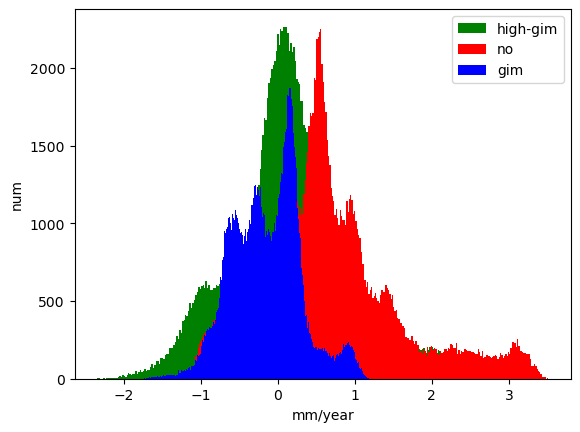

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 将二维数组转换为一维数组
masked_diff_velocity_gim_flat = masked_diff_velocity_gim_mm.flatten()

masked_diff_velocity_no_flat = masked_diff_velocity_no_mm.flatten()

masked_diff_velocity_hight_gim_mm = masked_diff_velocity_hight_gim*1000
masked_diff_velocity_hight_gim_flat = masked_diff_velocity_hight_gim_mm.flatten()
# 创建图形和坐标轴
fig, ax = plt.subplots()

# 绘制直方图
ax.hist(masked_diff_velocity_hight_gim_flat, bins=300, alpha=1, color='green',label= 'high-gim')
ax.hist(masked_diff_velocity_no_flat, bins=300, alpha=1, color='red' ,label= 'no')
ax.hist(masked_diff_velocity_gim_flat, bins=300, alpha=1, color='blue',label= 'gim')


# 添加图例
ax.legend()

# 设置坐标轴标签
ax.set_xlabel('mm/year')
ax.set_ylabel('num')

# 设置图形标题
#ax.set_title('Histogram')

# 显示图形
plt.show()